# **Project Name - Time Series Analysis on Infosys Stock Dataset**

# **Problem Statement**

# **Let's Begin!**

## ***1.Know Your Data***

### Import Libraries

In [510]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

### Dataset Loading

In [511]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [512]:
path = '/content/drive/MyDrive/Colab Notebooks/capstone_project_02/infosys 1 year data.xlsx'
dataset = pd.read_excel(path)

### Dataset First View

In [513]:
# Dataset First Look
dataset

,Date,Open,High,Low,Close
0,2022-01-03,1890.00,1914.00,1888.95,1897.15
1,2022-01-04,1899.00,1906.00,1878.00,1896.25
2,2022-01-05,1896.00,1900.80,1840.00,1844.95
3,2022-01-06,1827.15,1827.15,1800.00,1818.20
4,2022-01-07,1817.80,1835.80,1808.00,1813.15
...,...,...,...,...,...
243,2022-12-26,1497.65,1509.90,1496.15,1502.25
244,2022-12-27,1510.00,1521.10,1498.15,1515.50
245,2022-12-28,1505.00,1524.95,1498.85,1510.85
246,2022-12-29,1502.00,1521.00,1501.20,1517.50


### Dataset Rows & Columns Count

In [514]:
dataset.shape

(248, 5)

The shape of the dataset is 248 rows and 5 columns.

### Data Information

In [515]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    248 non-null    datetime64[ns]
 1   Open    248 non-null    float64       
 2   High    248 non-null    float64       
 3   Low     248 non-null    float64       
 4   Close   248 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.8 KB


### Duplicate Values

In [516]:
# Dataset Duplicate Value Count
dataset.duplicated().value_counts()

False    248
dtype: int64

### Missing Values/Null Values

In [517]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### The given dataset has 248 observations with 5 features including no missing values and no duplicates values. Date feature is of object type. closing, opening, highest and lowest stock prices are features in float datatypes.

# ***2. Understanding Variables***

In [518]:
dataset.head()

,Date,Open,High,Low,Close
0,2022-01-03,1890.00,1914.00,1888.95,1897.15
1,2022-01-04,1899.00,1906.00,1878.00,1896.25
2,2022-01-05,1896.00,1900.80,1840.00,1844.95
3,2022-01-06,1827.15,1827.15,1800.00,1818.20
4,2022-01-07,1817.80,1835.80,1808.00,1813.15


### Variables Description

In [519]:
dataset.describe()

,Open,High,Low,Close
count,248.000000,248.000000,248.000000,248.000000
mean,1593.684274,1609.115524,1576.875403,1592.615726
std,148.513047,149.632697,146.406606,148.497438
min,1363.500000,1383.750000,1355.500000,1365.250000
25%,1482.000000,1500.000000,1470.962500,1484.975000
50%,1547.275000,1561.075000,1532.075000,1544.225000
75%,1697.250000,1727.312500,1690.287500,1715.275000
max,1935.000000,1953.700000,1931.150000,1939.350000




*   Date :- The date (Month and Year provided)
*   Open :- The price of the stock at the beginning of a particular time period.
*   Close :- The trading price at the end (in this case end of the day)
*   High :-The Maximum price at which a stock traded during the period.
*   Low :-The Lowest price at which a stock traded during the period.

We can see from the dataset above, all the variables are quantitive it means it shows numerical values. There is no categorical data present.

The main objective is to predict the stock's opening price of the day so the opening price of stock have to be considered as dependent features whereas rest of the features are independent features.

In [520]:
# Setting date coloum as index as we need to track variation in stock price on different dates.
dataset.set_index('Date', inplace = True)

In [521]:
dependent_variable = 'Open'
independent_variables =list(set(dataset.columns.tolist())-{dependent_variable})
independent_variables

['Low', 'High', 'Close']

## *** Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Line plot**

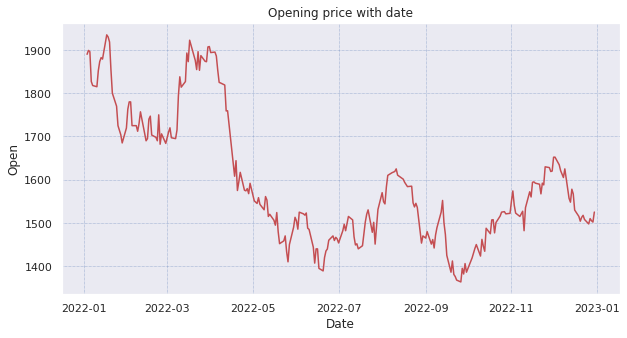

In [522]:
# plot dependent variable:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(dataset['Open'], color= 'r')
plt.title('Opening price with date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(linestyle=':', linewidth = '0.5', color = 'b') # to display and customize gridlines on a plot.
plt.show()


#### **Scatter Plots**

To check the linearity between dependent variable and independent variables. we are plotting the scatter plots.

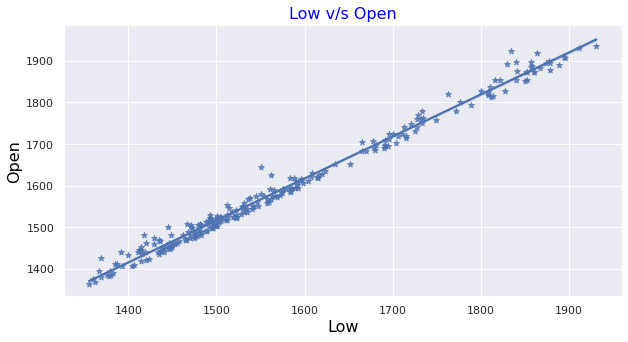

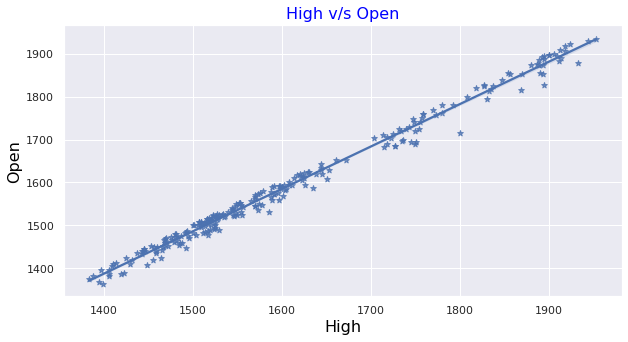

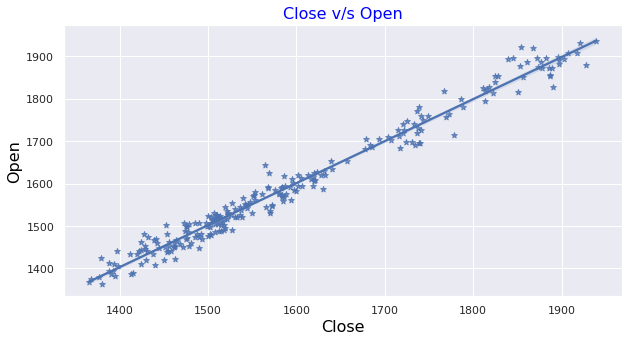

In [523]:
# Scatter plots
for i in independent_variables:
  sns.set(style='darkgrid')
  sns.regplot(dataset[i], dataset['Open'], marker='*')  # by default, fit_reg = True
  plt.title(f"{i} v/s Open", fontsize= 16, color = 'blue')
  plt.xlabel(f'{i}', fontsize=16, color = 'black')
  plt.ylabel("Open", fontsize=16, color='black')
  plt.show()


We can see from scatter plot above, Independent variables such as Low, Close, High are showing the linearity with dependent variable Open.

#### **Histogram with bell shaped curve**

To know about the distribution of features, we are plotting histogram with default kernel density estimate which will give the idea how the data is distributed.

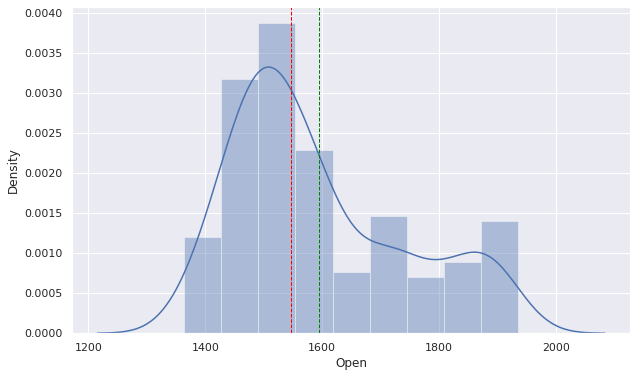

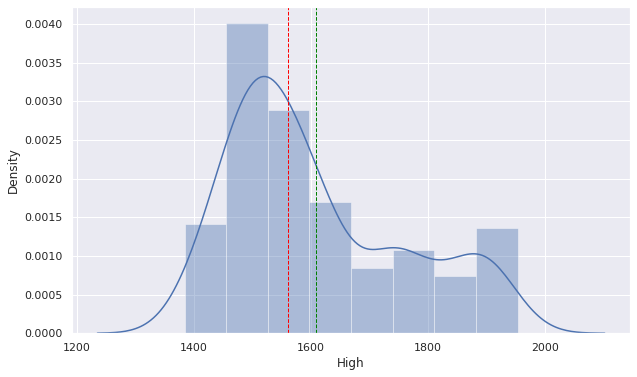

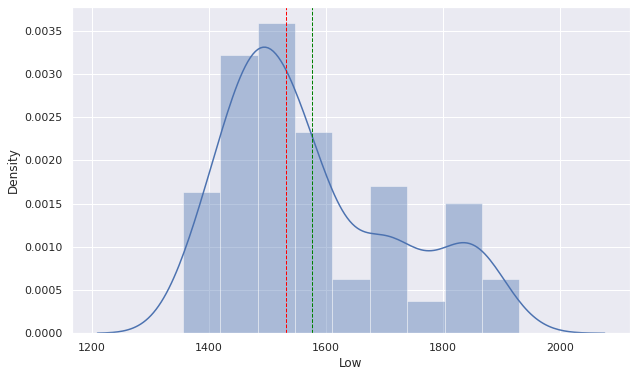

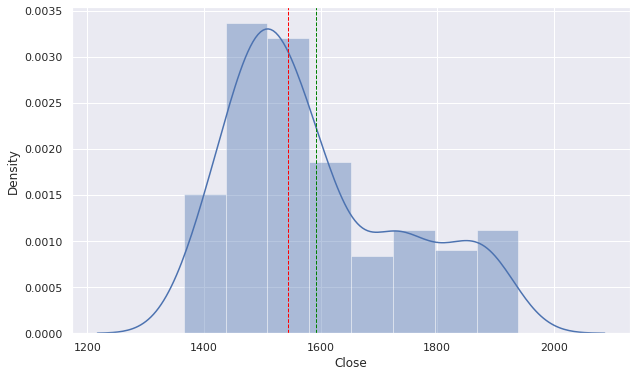

In [524]:
# Histogram
for i in dataset.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(dataset[i])
  plt.xlabel(f"{i}")

  # To plot the mean and the median line, axvline fuction is used which add the vertical line across the axis. 
  plt.axvline(dataset[i].mean(),color='green',linestyle='dashed', linewidth=1)  # vertical line at value mean.
  plt.axvline(dataset[i].median(),color='red',linestyle='dashed',linewidth=1)   # vertical line at value median.
  plt.show()
  

From the above graph, it is observed that:



*   All the freatures are positively skewed distributed. 

*   Mean is greater than Median i.e Mean > Median.
  





#### **Box-Whisker plots**

We are using Box Whisker plot to visualize five number summary and to detect the outliers.

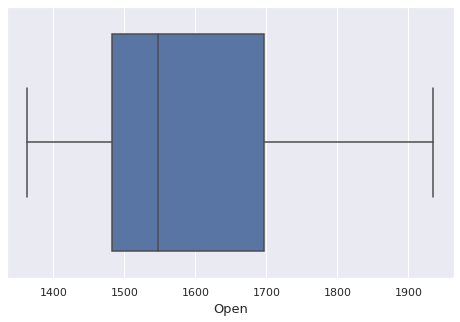

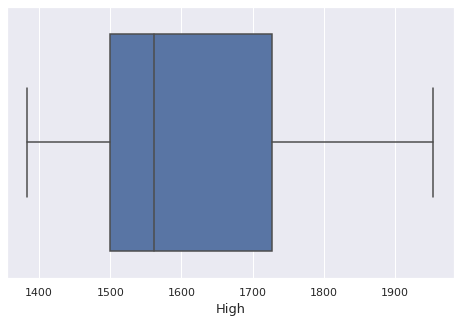

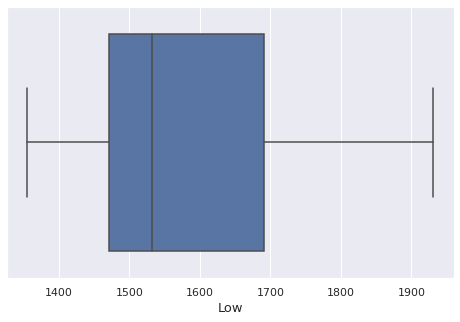

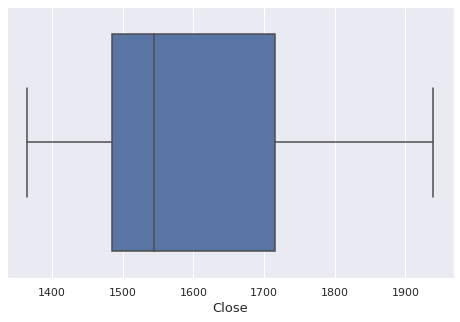

In [525]:
# Box-Whisker plot.
for i in dataset.columns:
  plt.rcParams['figure.figsize']=(8,5)
  sns.boxplot(dataset[i])
  plt.xlabel(f'{i}', fontsize=13)
  plt.show()



It is observed that there are some outliers present in given dataset.

####  **Correlation Heatmap**

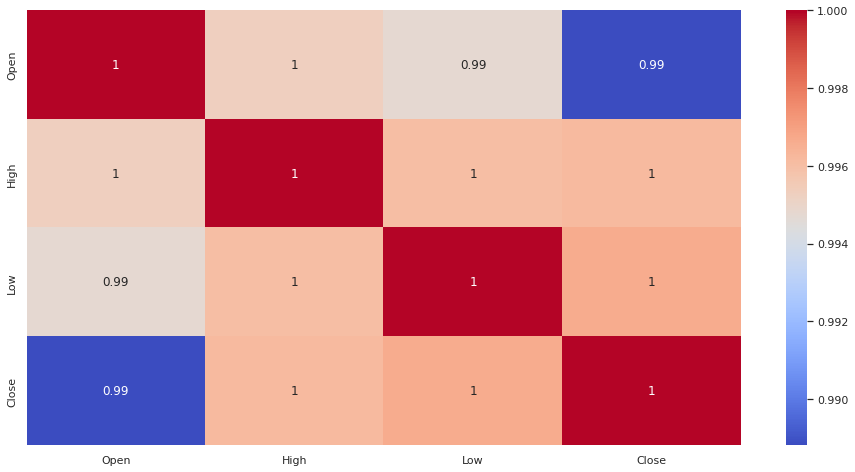

In [526]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,8))
sns.heatmap(dataset[list(dataset.columns)].corr(),cmap='coolwarm', annot = True)

#### **Pair Plots** 

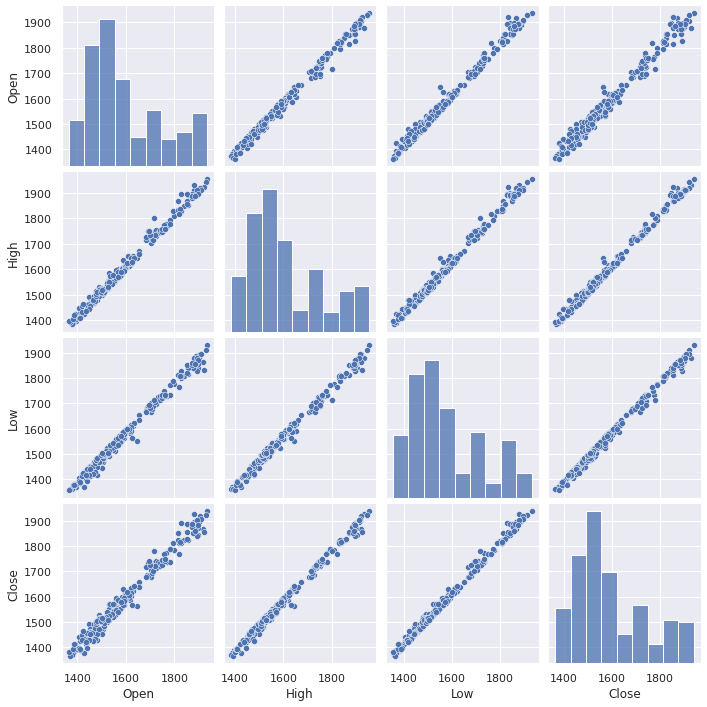

In [527]:
# Pair Plot visualization code
sns.pairplot(dataset)
plt.grid()


To know about the pairwise relationship amongs the variables close, High, Open and Low, pairwise plot is used and it is concluded that scatter plots indicates the joint relationship whereas histograms indicate the univariate distribution.

**Assumptions:**

The multiple regression model is based on a following assumptions:


* **Linearity:** There should be linear relationship between the dependent and independent variables.

*   **Normality:** Residual should be normally distributed with mear zero and constant variance σ2


*   **Homoscedasticity:** It means that the variance around the regression line is the same for all values of the predictor variable i.e Close 

*   **Multicollinearity:** There should not be multicollinearity in regression model.




In [528]:
df1 = pd.DataFrame(dataset['Open'])
df1

,Open
Date,
2022-01-03,1890.00
2022-01-04,1899.00
2022-01-05,1896.00
2022-01-06,1827.15
2022-01-07,1817.80
...,...
2022-12-26,1497.65
2022-12-27,1510.00
2022-12-28,1505.00


In [529]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-01-03 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    248 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


# **Time Series Analysis**

## To know data

In [530]:
dataset.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

In [531]:
dataset['Open']

Date
2022-01-03    1890.00
2022-01-04    1899.00
2022-01-05    1896.00
2022-01-06    1827.15
2022-01-07    1817.80
               ...   
2022-12-26    1497.65
2022-12-27    1510.00
2022-12-28    1505.00
2022-12-29    1502.00
2022-12-30    1525.15
Name: Open, Length: 248, dtype: float64

## plot of dependenet variable:

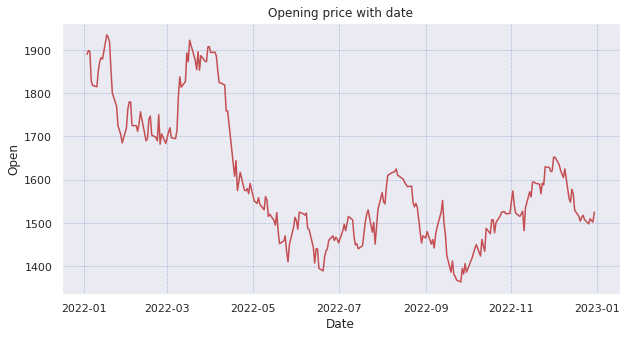

In [532]:
# plot dependent variable:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(dataset['Open'], color= 'r')
plt.title('Opening price with date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(linestyle=':', linewidth = '0.5', color = 'b') # to display and customize gridlines on a plot.
plt.show()

decresing trend


### **Decomposion of time series data:**

In [533]:
#df1.info()

In [534]:
#df1.head()

In [535]:
#df1.loc['2022-01-07']

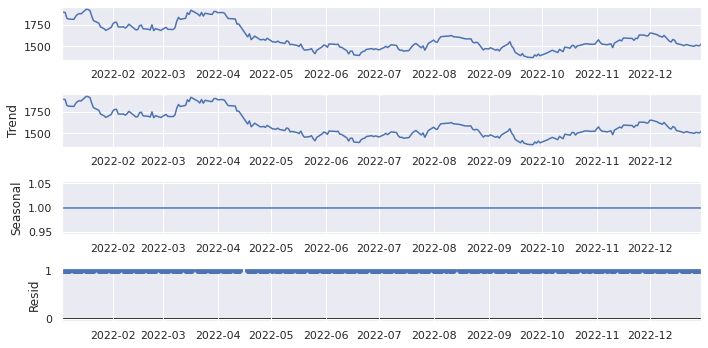

In [536]:
## decompose the time series multiplicatively.
df1_mul_decompose = seasonal_decompose(df1, model="multiplicative", period = 1) #Don't get seasonality as 1 period have been taken.
df1_mul_decompose.plot()
plt.show()

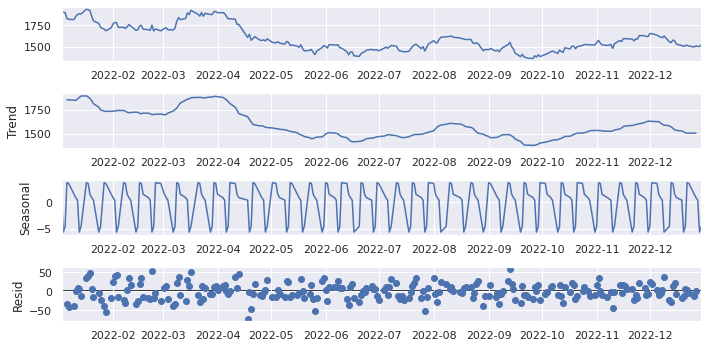

In [537]:
## decompose the time series multiplicatively.
df1_mul_decompose = seasonal_decompose(df1, model="additive", period = 7) # week
df1_mul_decompose.plot()
plt.show()

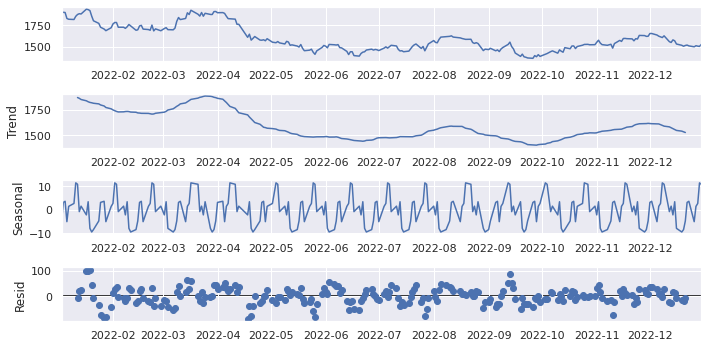

In [538]:
## decompose the time series multiplicatively.
df1_mul_decompose = seasonal_decompose(df1, model="additive", period = 15)
df1_mul_decompose.plot()
plt.show()

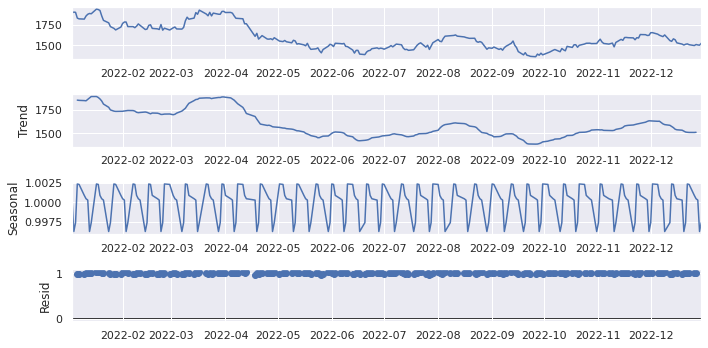

In [539]:
## decompose the time series multiplicatively.
df1_mul_decompose = seasonal_decompose(df1, model="multiplicative", period = 7)
df1_mul_decompose.plot()
plt.show()

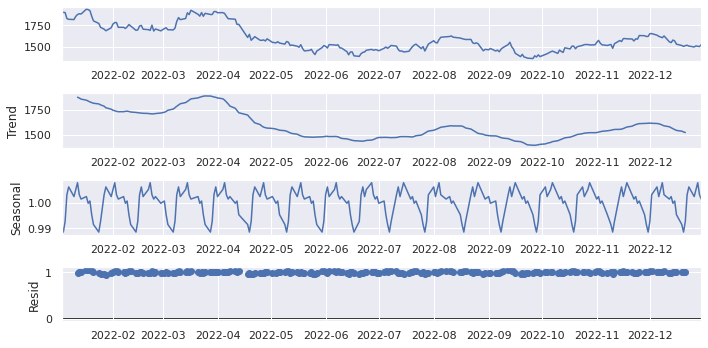

In [540]:
## decompose the time series multiplicatively.
df1_mul_decompose = seasonal_decompose(df1, model="multiplicative", period = 14)
df1_mul_decompose.plot()
plt.show()

### **Stationarity:**

Before we start modeling, we should mention such an important property of time series stationarity.
If a process is stationary, that means it does not change its statistical properties over time, namely

1.   mean and variance (The constancy of vriance is called homoscedasticity)

2.  The covariance function does not depend on time. it should only depend on the distance between observations. 



The red graph below is not stationary because the mean increases over the time.

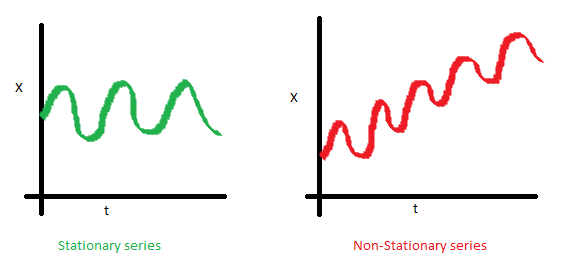

We were unlucky with the variance and see the varying spread of values over time

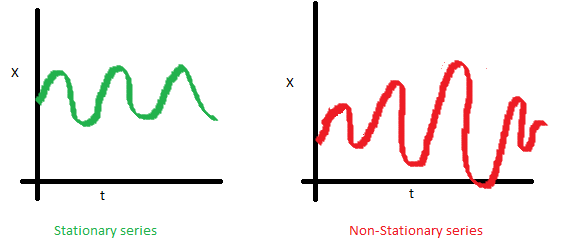

Finally, the covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice that the spread becomes closer as time increases. Hence, the covariance is not constant with time in the chart below.

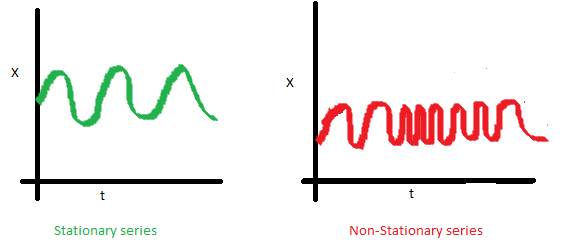

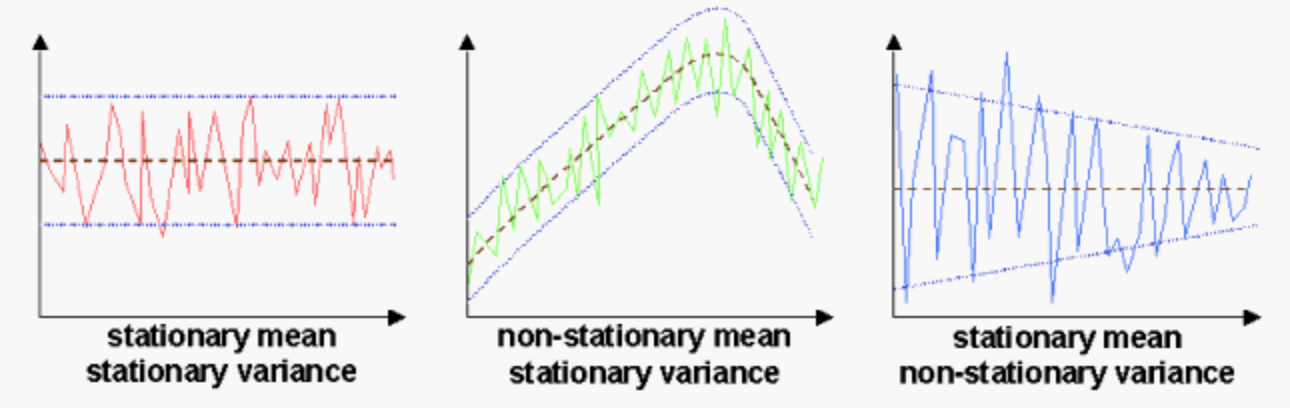

So why is stationarity so important? Because it is easy to make predictions on a stationary series since we can assume that the future statistical properties will not be different from those currently observed.

In [541]:
# Dickey fuller test:
# null Hypo: There is no stationarity.
# Augmented Dickey Fuller Test test.
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = pd.Series(timeseries).rolling(window=7).mean()
  rolstd = pd.Series(timeseries).rolling(window=7).std()

  # plot rolling statistics
  # timeseries
  orig=plt.plot(timeseries, color='blue', label='Original')
  # mean
  mean = plt.plot(rolmean, color='red', label = 'Moving Mean')
  # Std-dev
  std = plt.plot(rolstd, color = 'black', label='Moving std')
  plt.legend(loc='best')
  plt.title('Moving mean & Standard Deviation')
  plt.show()
  
  # perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'P-value', '#lags used','Number of observations used'])
  for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]=value
  print(dfoutput)
  




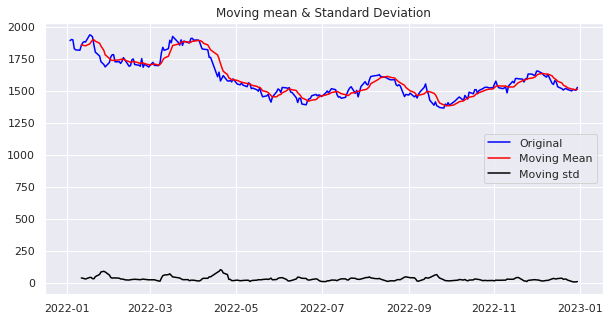

Results of Dickey-Fuller Test:
Test Statistic                  -2.182935
P-value                          0.212497
#lags used                       1.000000
Number of observations used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [543]:
test_stationarity(df1['Open'])

### Moving Averages:

In [547]:
# moving Average
def moving_average(series, n):
  # calculate average of last n observations
  return np.average(series[-n:])


In [548]:
moving_average(df1, 7)  # prediction for next day, using the last observed day's data.   # i think.

1509.3357142857144

In [549]:
#moving_average(df1, 1)  # prediction for next day, using the last observed day's data.

In [550]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

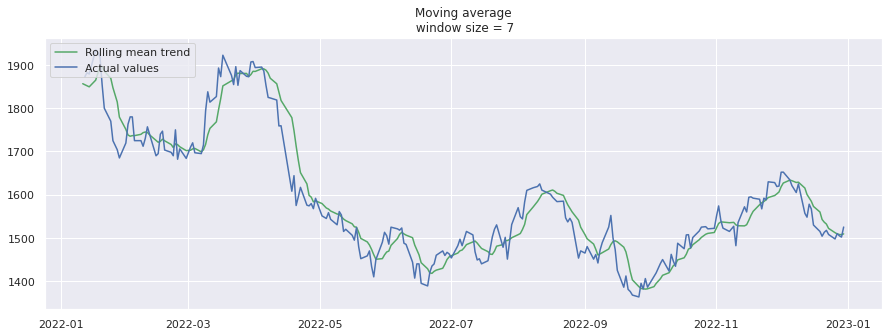

In [551]:
plotMovingAverage(df1,7)

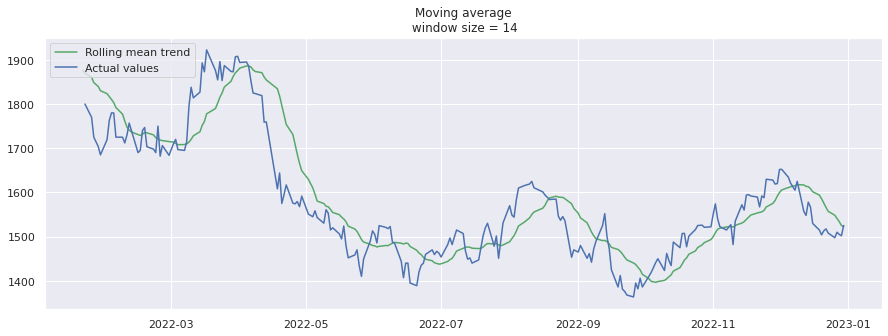

In [552]:
plotMovingAverage(df1,14)

In [553]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

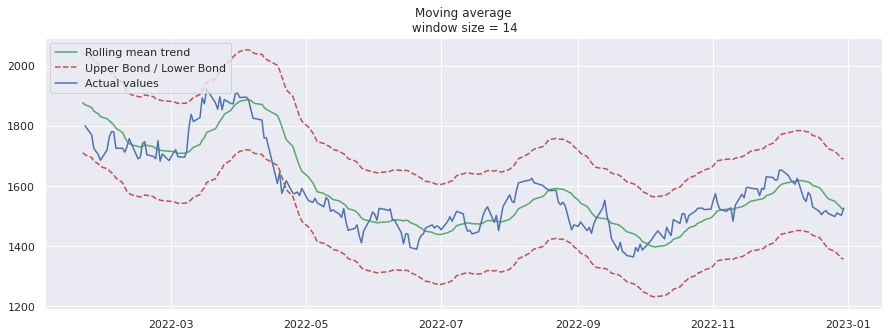

In [554]:
plotMovingAverage(df1,14, plot_intervals = True)

In [555]:
# weighted_average
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [556]:
weighted_average(df1, [0.6, 0.3, 0.1])

1516.19

In [557]:
# Exponential smoothing
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [558]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

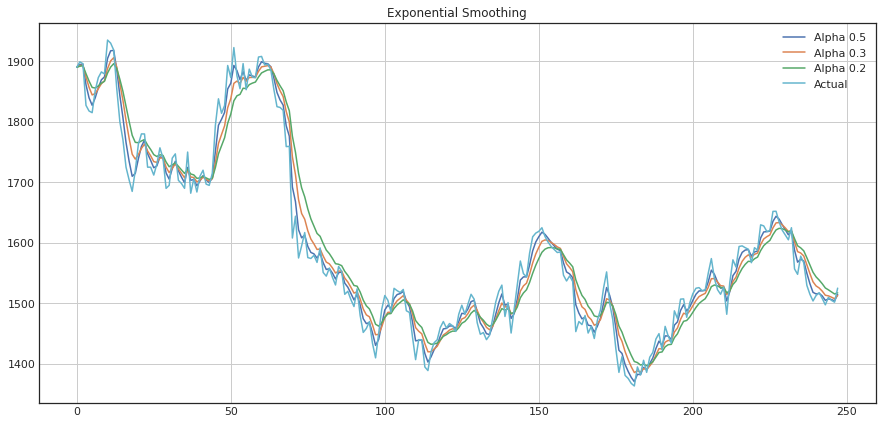

In [559]:
plotExponentialSmoothing(df1['Open'], [0.5,0.3, 0.2])

In [560]:
# Double exponential smoothing (Holt's linear trend method)
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

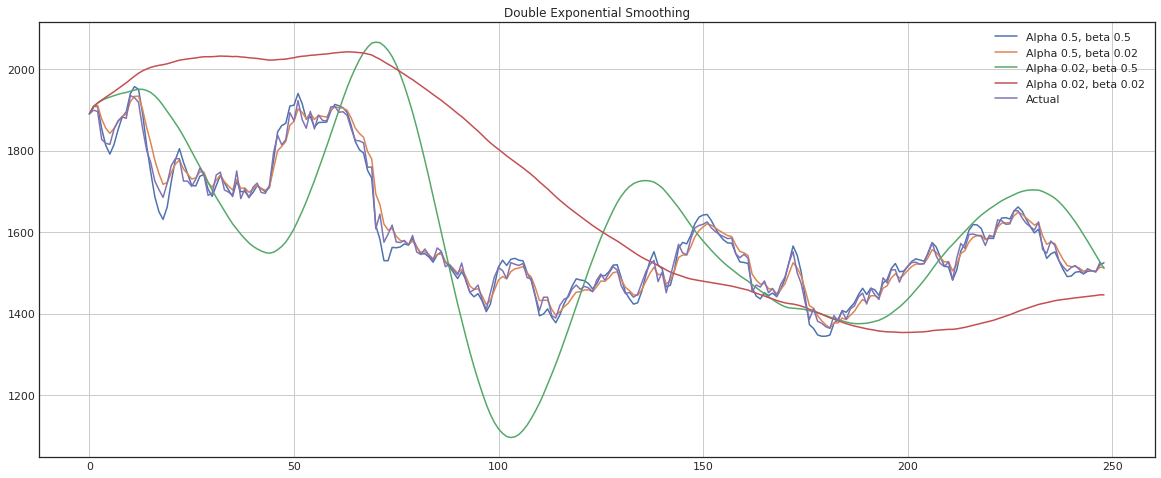

In [561]:
plotDoubleExponentialSmoothing(df1['Open'], alphas=[0.5, 0.02], betas=[0.5, 0.02])

In [562]:
'''def plotProcess(n_samples=248, rho=0):
    x = w = df1['Open']
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)'''

'def plotProcess(n_samples=248, rho=0):\n    x = w = df1[\'Open\']\n    for t in range(n_samples):\n        x[t] = rho * x[t-1] + w[t]\n\n    with plt.style.context(\'bmh\'):  \n        plt.figure(figsize=(10, 3))\n        plt.plot(x)\n        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))\n        \nfor rho in [0, 0.6, 0.9, 1]:\n    plotProcess(rho=rho)'

In [563]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

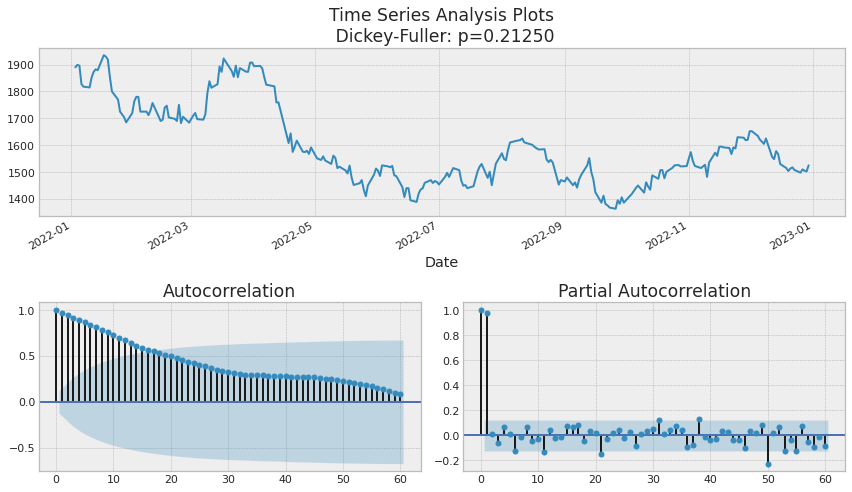

In [564]:
tsplot(df1['Open'], lags=60)

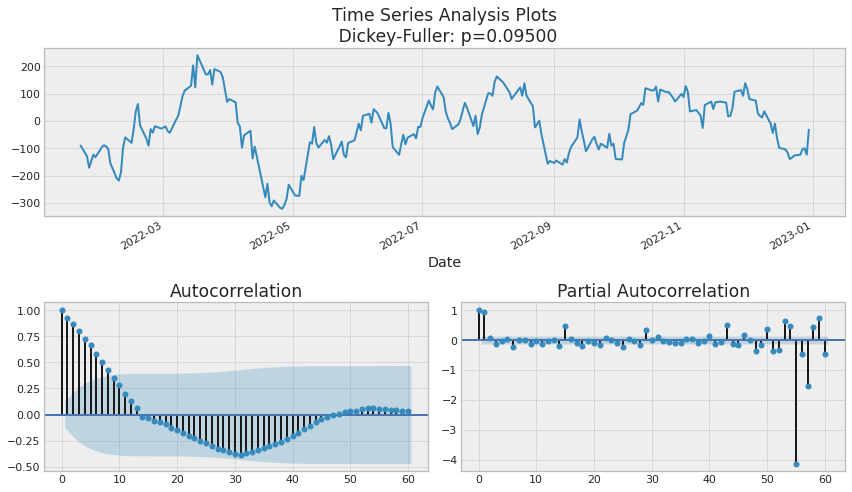

In [565]:
open_diff = df1['Open'] - df1['Open'].shift(14)
tsplot(open_diff[14:], lags=60)

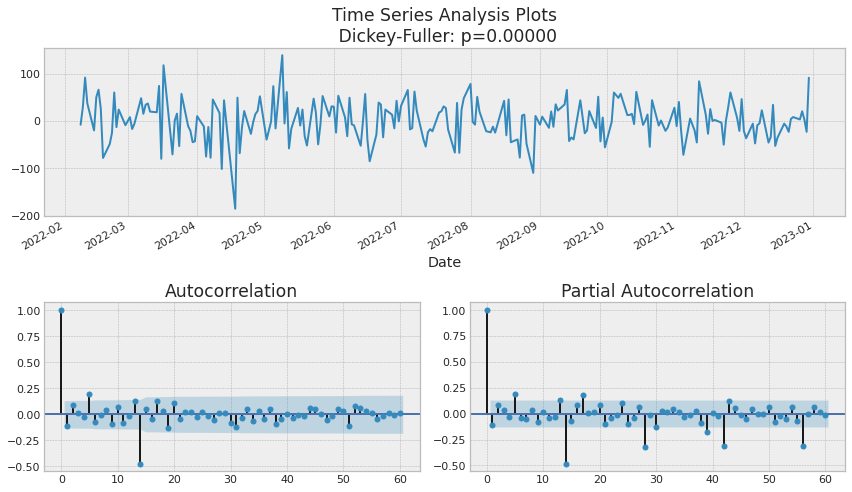

In [566]:
open_diff = open_diff - open_diff.shift(1)
tsplot(open_diff[24+1:], lags=60)

Try to more things to do with .....### Perfect! Our series now looks like something undescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary.

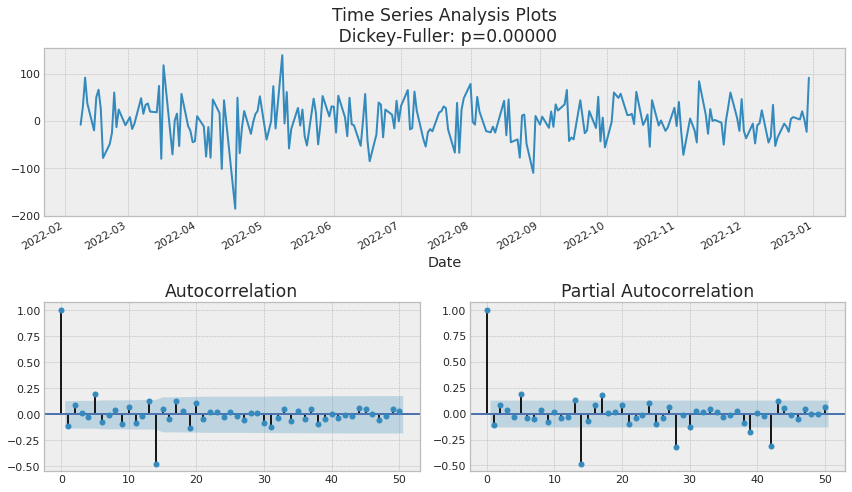

In [567]:
tsplot(open_diff[24+1:], lags=50)